# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1335.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.01e-44
Time:                        14:23:49   Log-Likelihood:                 11.103
No. Observations:                  50   AIC:                            -14.21
Df Residuals:                      46   BIC:                            -6.558
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0955      0.069     73.996      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.62279689  5.08175207  5.50365907  5.86282191  6.14281817  6.33919712
  6.46021097  6.52545906  6.56266774  6.60313502  6.67658837  6.8063006
  7.00526622  7.27406643  7.60077367  7.96291129  8.33114635  8.67410901
  8.96354644  9.17896472  9.31099592  9.36293723  9.35020922  9.29782233
  9.23626768  9.19650747  9.20488801  9.27881106  9.4238748   9.63295405
  9.8873709  10.15996347 10.41954852 10.63604474 10.78541508 10.85361591
 10.83890438 10.75212478 10.61492681 10.45620864 10.30736899 10.19714842
 10.14690734 10.16711658 10.25563699 10.39807099 10.57012797 10.74161521
 10.88139847 10.96251721]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.95598062 10.82491737 10.58781765 10.28681825  9.97738603  9.71473766
  9.54032068  9.47166571  9.49809429  9.5833334 ]


## Plot comparison

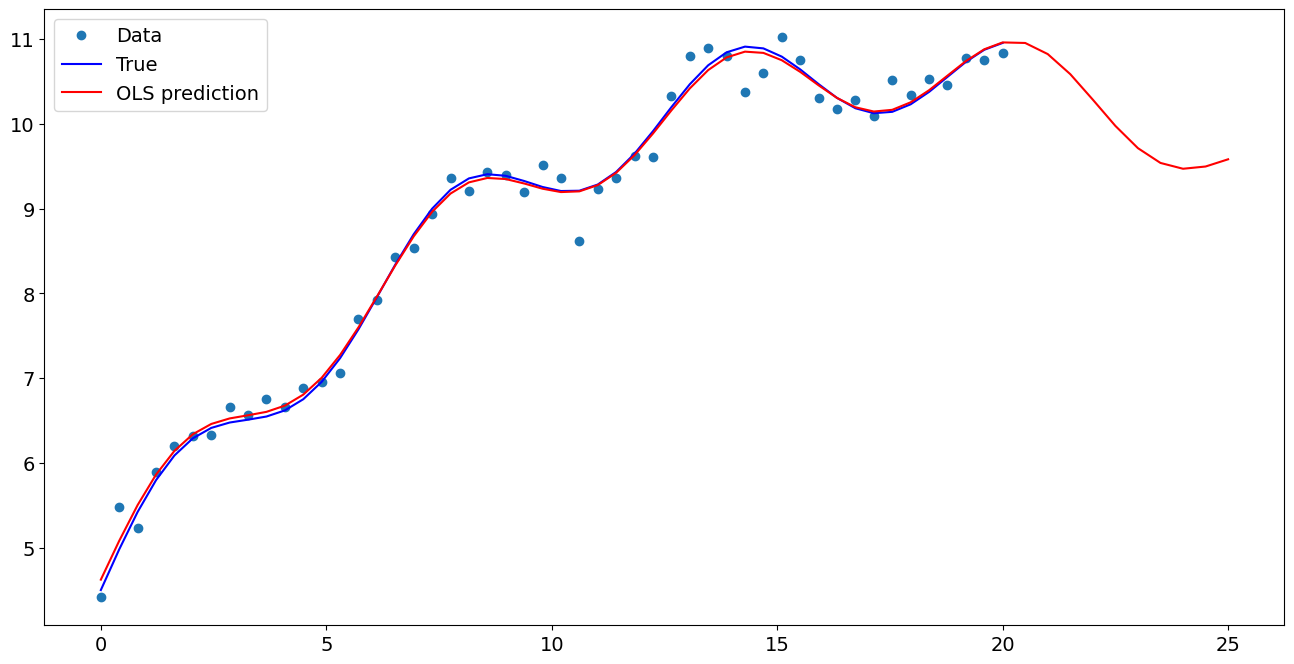

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.095527
x1                  0.484556
np.sin(x1)          0.471493
I((x1 - 5) ** 2)   -0.018909
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.955981
1    10.824917
2    10.587818
3    10.286818
4     9.977386
5     9.714738
6     9.540321
7     9.471666
8     9.498094
9     9.583333
dtype: float64